# Model Explainability

####

In [ ]:
import joblib
import pandas as pd
import shap
import xgboost
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data_loader import load_data
# Load model
xgb_clf = joblib.load("../models/xgb_fraud_model.joblib")

# Load the scaled feature data used in training
X = load_data("../data/X_train_scaled.csv")  # or X_test_scaled.csv


In [2]:
explainer = shap.Explainer(xgb_clf, X)

In [3]:
shap_values = explainer(X)

100%|===================| 218986/219136 [25:57<00:01]        

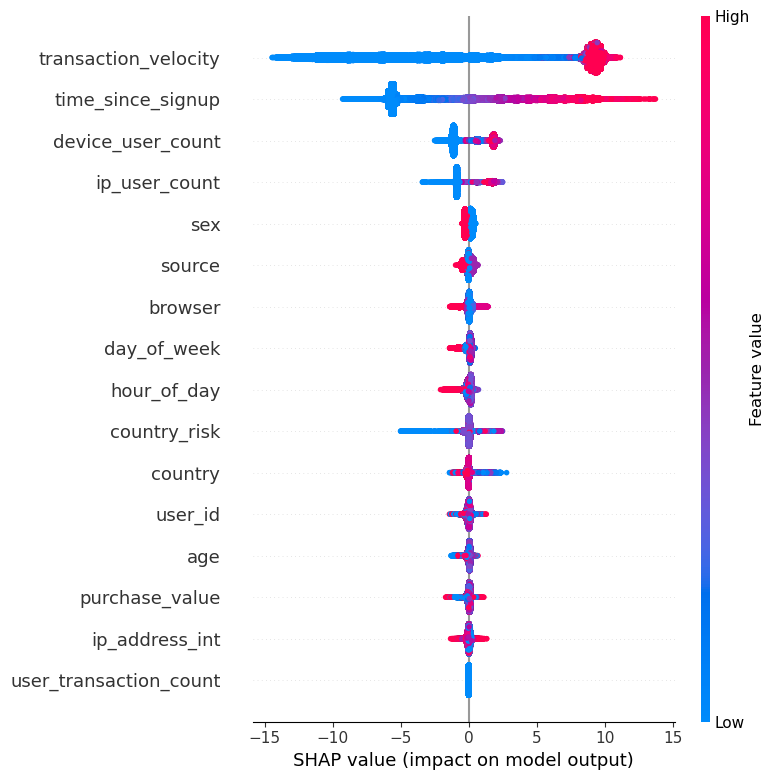

In [4]:
shap.summary_plot(shap_values, X, show=True)

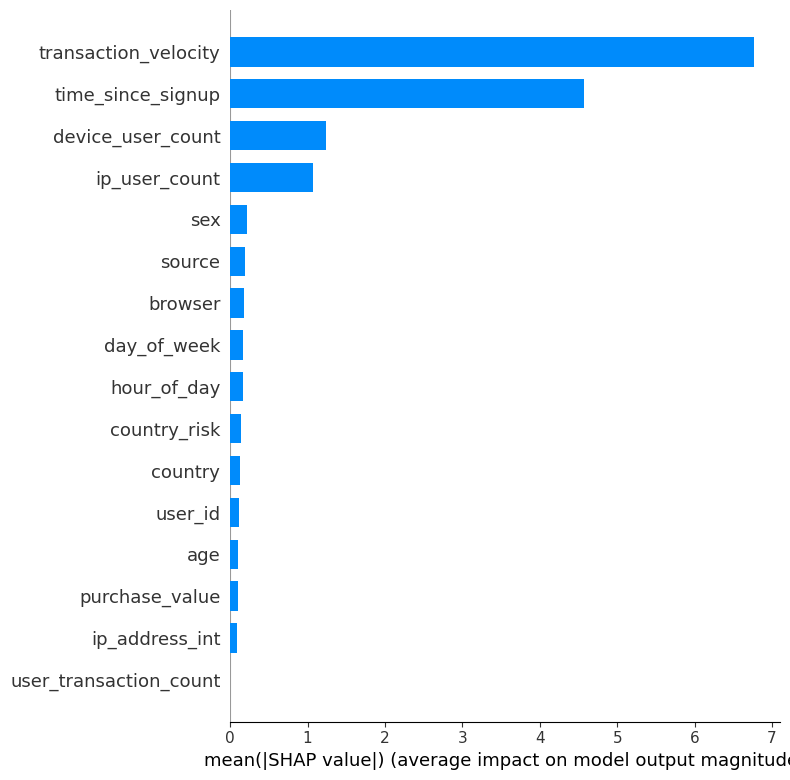

In [5]:
shap.summary_plot(shap_values, X, plot_type="bar", show=True)

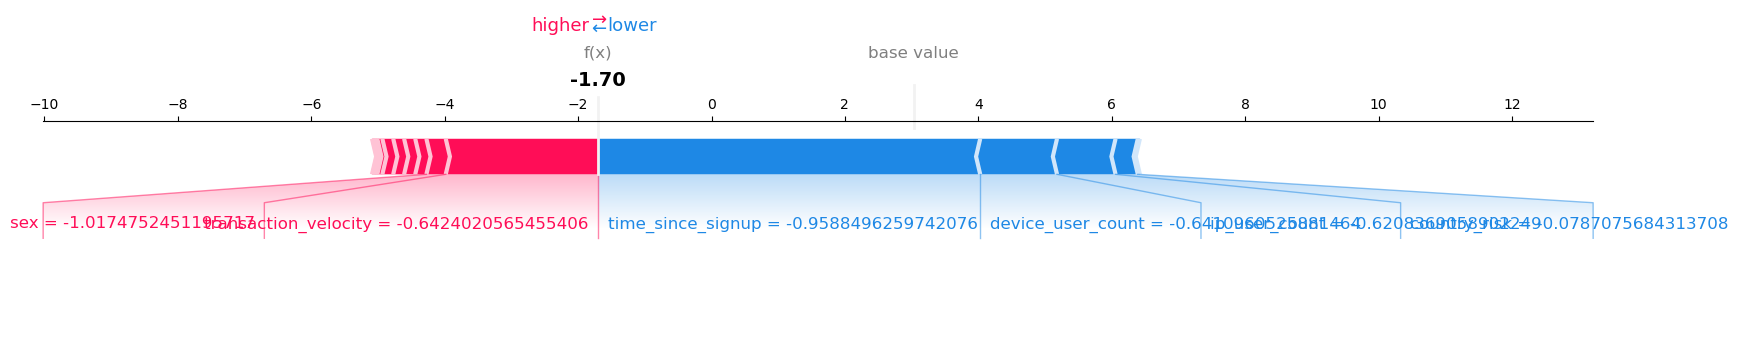

In [6]:
sample_index = 0
shap.initjs()  # For Jupyter notebook display
shap.force_plot(explainer.expected_value, shap_values[sample_index].values, X.iloc[sample_index], matplotlib=True)